# AIRBNB NEW YORK CITY PRICING DYNAMICS
### Data Bootcamp Final Project

###### *Principal Investigators : Samantha Warsop & Brittany Miu*                           
###### Email: sw3469@nyu.edu bm2352@nyu.edu

This project will explore how pricing differs across Airbnbs and the influences it has on demand. We will also explore the seasonal pattern of airbnb prices in New York City and the effects it has on travel. As an example, in New York City, Airbnb prices across different neighbourhood groups such as Manhattan, Brooklyn, Queens, Staten Island, and the Bronx might differ. We can look at how pricing varies across these different neighbourhood groups in terms of the number of the listings and property type available. 

The key element of the project is the use of Airbnb’s data, providing access to measures such as prices, number of listings, property type, etc.  in New York. Detailed of this dataset are described below in the data report. 

There will be three different sections in this project: 
##### 1. Basic Data Analysis

This section will have different summary statistics describing the number of listings and property type in each neighbourhood group.
##### 2. Pricing Effect on Demand for Airbnbs in New York City

This section will explore how prices differ across different neighbourhood groups and discover what factors prices are dependent on. We will have visualizations such as a map to indicate where entire apartments/homes are most prevalent. There will be a bar chart illustrating the average prices in each neighbourhood. By analyzing the number of listings and prices per neighbourhood, we can find out which neighbourhood is the most optimal. 
##### 3. Seasonal Pattern of Prices 

The last will explore how prices vary across different seasons. We plan to have visualizations showing how prices change over the year and provide explanations as to why. For example, airbnb prices during the holidays might be more expensive than during non-holidays. 

### Overview: 
The data behind our project comes from [insideairbnb](http://insideairbnb.com/get-the-data.html) . Their [New York city data](http://insideairbnb.com/new-york-city/) provides access to information on room types, availability, activity, as well as listings per host. 

##### Important Variables:
The key series that we must retrive is within insideairbnb's data on [New York city data](http://insideairbnb.com/new-york-city/).
This data provides the airbnb locations, as well as pricing, which will allow us to determine answers to both analysis part one and two. 
This data combined with utalizing datetime and holiday functions will allow us to analyze Airbnb's seasonal pattern of prices.  

##### Access: 
We will use insideairbnb to download and acess the data. Below we will demonstrate that we have the ability to access the data. NOTE: csv files could not be uploaded to github due to the file size. Files are in a flashdrive left at your office.  


##### Requisite Packages:  
Below we will bring in the packages we need:

In [1]:
import pandas as pd
import numpy as np #numerical analysis 
import matplotlib.pyplot as plt #plotting
import geopandas as gpd #geospatial data in python
import os #manipulate paths
from datetime import date #maniupulating dates and times 
import datetime
import holidays #generate country specific sets of holidays
import calendar #useful functions related to the calendar
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes #maniupulate data to get zoomed in picture 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

##### Cleaned Data: 

Data that was cleaned in a separate notebook can be accessed in our [Data Report](https://github.com/brittanymiu/data_bootcamp_final_project/blob/master/Airbnb_Data%20Report_SamanthaWarsop_BrittanyMiu.ipynb)

NOTE: csv files could not be uploaded to github due to the file size. Files are in a flashdrive left at your office. 

In [2]:
file= "/Users/SamanthaWarsop 1/Airbnb New York/clean_listings.csv"

In [4]:
#listings csv is going to be used in analysis part one and two 
listings = pd.read_csv(file)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
listings.head()

,Unnamed: 0,listing_id,experiences_offered,host_id,host_acceptance_rate,host_is_superhost,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,0,1742654,none,9173924,0.0,t,"New York, NY, United States",Hell's Kitchen,Hell's Kitchen,Manhattan,...,10.0,10.0,10.0,10.0,f,f,f,t,t,1.87
1,2,15984984,none,9737900,0.0,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,...,10.0,10.0,10.0,10.0,f,t,f,f,f,1.24
2,3,13820083,none,31829334,0.0,f,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,...,10.0,9.0,10.0,9.0,f,t,f,f,f,0.27
3,4,6170979,none,31104121,0.0,f,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,...,10.0,9.0,9.0,9.0,f,t,f,f,f,2.63
4,5,27283214,none,3508466,0.0,f,"New York, NY, United States",Manhattan,Hell's Kitchen,Manhattan,...,10.0,10.0,10.0,10.0,f,f,f,f,f,0.32


In [6]:
calendar_file = "/Users/SamanthaWarsop 1/Airbnb New York/clean_calendar.csv"

In [7]:
#calendar csv will be used in analysis part three
calendar_df = pd.read_csv(calendar_file)

In [8]:
calendar_df.head()

,Unnamed: 0,listing_id,date,available,price,minimum_nights,maximum_nights,Year,Month,Day
0,0,36647,2019-03-07,f,69.0,2.0,730.0,2019,3,7
1,1,36647,2019-03-08,f,69.0,2.0,730.0,2019,3,8
2,2,36647,2019-03-09,f,69.0,2.0,730.0,2019,3,9
3,3,36647,2019-03-10,f,69.0,2.0,730.0,2019,3,10
4,4,36647,2019-03-11,f,69.0,2.0,730.0,2019,3,11


In [9]:
#listings_calendar csv will be used in analysis part three
listings_calendar_file = "/Users/brittanymiu/Airbnb New York/listings_calendar.csv"

In [10]:
listings_calendar = pd.read_csv(listings_calendar_file)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
listings_calendar.head()

,Unnamed: 0,listing_id,experiences_offered,host_id,host_acceptance_rate,host_is_superhost,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,require_guest_phone_verification,reviews_per_month,date,available,price_y,minimum_nights_y,maximum_nights_y,Year,Month,Day
0,0,1742654,none,9173924.0,0.0,t,"New York, NY, United States",Hell's Kitchen,Hell's Kitchen,Manhattan,...,t,1.87,2019-03-06,f,185.0,2.0,1125.0,2019,3,6
1,1,1742654,none,9173924.0,0.0,t,"New York, NY, United States",Hell's Kitchen,Hell's Kitchen,Manhattan,...,t,1.87,2019-03-07,f,185.0,2.0,1125.0,2019,3,7
2,2,1742654,none,9173924.0,0.0,t,"New York, NY, United States",Hell's Kitchen,Hell's Kitchen,Manhattan,...,t,1.87,2019-03-08,t,185.0,2.0,1125.0,2019,3,8
3,3,1742654,none,9173924.0,0.0,t,"New York, NY, United States",Hell's Kitchen,Hell's Kitchen,Manhattan,...,t,1.87,2019-03-09,t,185.0,2.0,1125.0,2019,3,9
4,4,1742654,none,9173924.0,0.0,t,"New York, NY, United States",Hell's Kitchen,Hell's Kitchen,Manhattan,...,t,1.87,2019-03-10,t,185.0,2.0,1125.0,2019,3,10


## ANALYSIS PART ONE
### BASIC DATA ANALYSIS
Before we look at airbnb prices, we are first going to look at the number of listings and room type in each neighborhood group. 

In [12]:
#finding the number of listings for each neighbourhood group
neighborhood_group_df = listings.groupby('neighbourhood_group_cleansed').listing_id.count()
neighborhood_group_df = neighborhood_group_df.reset_index()
neighborhood_group_df = neighborhood_group_df.rename(columns={'listing_id':'Number_of_Listings'})
neighborhood_group_df

,neighbourhood_group_cleansed,Number_of_Listings
0,Bronx,745
1,Brooklyn,14555
2,Manhattan,13817
3,Queens,3969
4,Staten Island,257


In [13]:
#finding the number of room types
room_type = listings.groupby('room_type').listing_id.count()
room_type = room_type.reset_index()
room_type = room_type.rename(columns = {'listing_id': 'room_count'})
room_type 

,room_type,room_count
0,Entire home/apt,16467
1,Private room,16139
2,Shared room,737


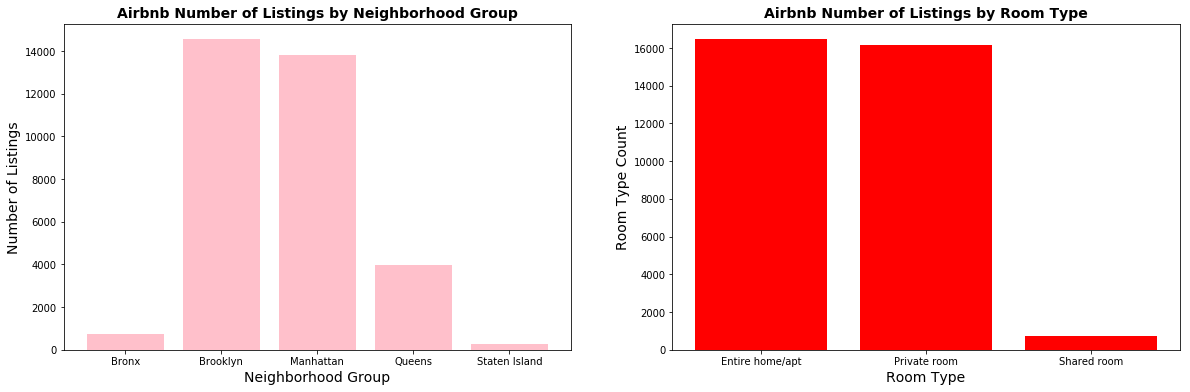

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize = (20,6)) 

ax[0].bar(neighborhood_group_df.neighbourhood_group_cleansed, neighborhood_group_df.Number_of_Listings, color = "pink")

ax[0].set_title("Airbnb Number of Listings by Neighborhood Group", fontsize = 14, fontweight = "bold")  
                                                                  
ax[0].set_ylabel("Number of Listings", fontsize = 14,)
ax[0].set_xlabel("Neighborhood Group", fontsize = 14,)

ax[1].bar(room_type.room_type, room_type.room_count, color = "red")

ax[1].set_title("Airbnb Number of Listings by Room Type", fontsize = 14, fontweight = "bold")  
                                                                  
ax[1].set_ylabel("Room Type Count", fontsize = 14,)
ax[1].set_xlabel("Room Type", fontsize = 14,)
    
plt.show()

In [15]:
#finding the number of listings for each room type in each neighbourhood group
neighborhood_room = listings.groupby(['neighbourhood_group_cleansed', 'room_type']).listing_id.count()
neighborhood_room = neighborhood_room.reset_index()
neighborhood_room = neighborhood_room.rename(columns={'listing_id':'Number_of_Listings'})
neighborhood_room.set_index(['neighbourhood_group_cleansed', 'room_type'])
neighborhood_room

,neighbourhood_group_cleansed,room_type,Number_of_Listings
0,Bronx,Entire home/apt,226
1,Bronx,Private room,486
2,Bronx,Shared room,33
3,Brooklyn,Entire home/apt,6976
4,Brooklyn,Private room,7308
5,Brooklyn,Shared room,271
6,Manhattan,Entire home/apt,7742
7,Manhattan,Private room,5775
8,Manhattan,Shared room,300
9,Queens,Entire home/apt,1406


In [16]:
#creating a map 
#NYC shape file is from Professor Michael Waugh's Data Bootcamp course 
cwd = os.getcwd()

In [17]:
shape_file = cwd + "/shape_file/ZIP_CODE_040114.shx"

In [18]:
shape_file

'/Users/brittanymiu/Airbnb New York/shape_file/ZIP_CODE_040114.shx'

In [19]:
nyc_map = gpd.read_file(shape_file)

In [20]:
nyc_map.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


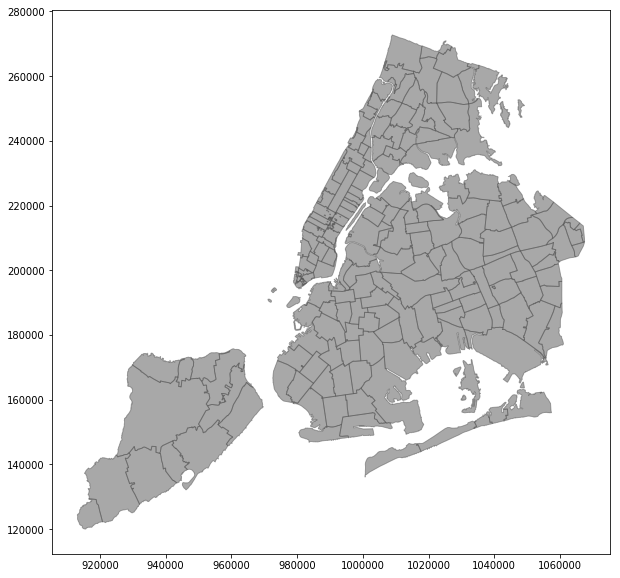

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
gpd.plotting.plot_polygon_collection(ax,
                                     nyc_map['geometry'],
                                     linewidth=0.9,
                                     edgecolor='#B9EBE3',
                                     alpha=0.5,
                                     color='#525252');

In [22]:
#looking at the number of neigborhoods in NYC
listings.neighbourhood_cleansed.value_counts()

Williamsburg                  2850
Bedford-Stuyvesant            2789
Harlem                        1992
Bushwick                      1733
Hell's Kitchen                1273
East Village                  1270
Upper West Side               1227
Crown Heights                 1135
Upper East Side               1061
East Harlem                    825
Greenpoint                     753
Midtown                        734
Lower East Side                639
Washington Heights             628
Chelsea                        625
Astoria                        603
West Village                   472
Flatbush                       451
Clinton Hill                   413
Prospect-Lefferts Gardens      392
Long Island City               366
Park Slope                     366
East Flatbush                  362
Flushing                       341
Financial District             322
Fort Greene                    318
Murray Hill                    286
Sunset Park                    283
Ridgewood           

In [23]:
#assigning id to each neighbourhood_clensed 
listings = listings.assign(neighbourhood_cleansed_id=listings['neighbourhood_cleansed'].astype('category').cat.codes)

In [24]:
#creating a new data frame of stats grouped by neighbourhood_cleansed_id
listings_stats = listings.groupby(['neighbourhood_cleansed_id'])
agg = pd.core.groupby.GroupBy.aggregate
avg_price = listings_stats['price'].agg(np.mean)
avg_eval_loc = listings_stats['review_scores_location'].agg(np.mean)
avg_eval_val = listings_stats["review_scores_rating"].agg(np.mean)
listings_count = listings_stats['listing_id'].agg('count')

In [25]:
listings_stats_df = pd.DataFrame({'neighbourhood_cleansed_id':avg_price.index,
                            'count': listings_count.values,
                            'mean_price':avg_price.values, 
                           'eval_mean':avg_eval_loc.values,
                            'eval_mean_val':avg_eval_val.values})
listings_stats_df.head()

,neighbourhood_cleansed_id,count,mean_price,eval_mean,eval_mean_val
0,0,33,91.727273,9.303030,94.636364
1,1,2,62.000000,9.500000,92.000000
2,2,19,108.631579,9.578947,95.947368
3,3,60,165.383333,9.383333,95.316667
4,4,603,120.338308,9.630182,94.663350


In [26]:
#creating a new data frame with geometric coordinates 
crs = nyc_map.crs
gdf_listings = gpd.GeoDataFrame(listings_stats_df, crs=crs, geometry=nyc_map['geometry'])
gdf_listings.head()

,neighbourhood_cleansed_id,count,mean_price,eval_mean,eval_mean_val,geometry
0,0,33,91.727273,9.303030,94.636364,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,1,2,62.000000,9.500000,92.000000,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,2,19,108.631579,9.578947,95.947368,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,3,60,165.383333,9.383333,95.316667,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,4,603,120.338308,9.630182,94.663350,"POLYGON ((991997.1134308875 176307.4958601296,..."


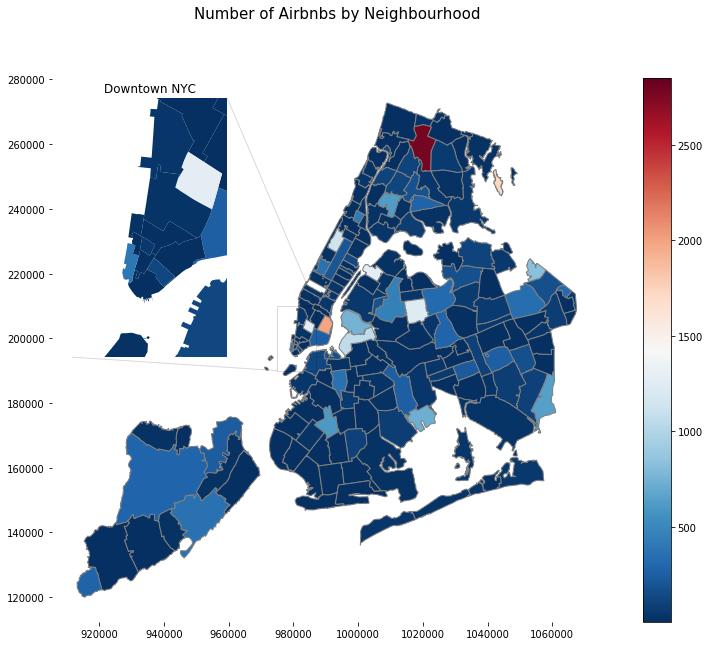

In [27]:
#creating a map showing the number of airbnbs 
fig, ax = plt.subplots(figsize=(15,10));

gdf_listings.plot(ax = ax, edgecolor='tab:grey', column = 'count', cmap='RdBu_r', legend = True)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

fig.suptitle("Number of Airbnbs by Neighbourhood", fontsize = 15)

#code for zoomed in picture of Downtown NYC is from Professor Michael Waugh's class Data Bootcamp
axins = zoomed_inset_axes(ax, 
                          4, 
                          loc=2, 
                          borderpad=2)  

gdf_listings.plot(ax = axins, column='count', cmap='RdBu_r')

x1, x2, y1, y2 = 975000, 987000, 190000, 210000
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.set_title("Downtown NYC")

mark_inset(ax, axins, loc1=3, loc2=1, alpha = 0.15)

axins.spines["right"].set_visible(False)
axins.spines["top"].set_visible(False)
axins.spines["left"].set_visible(False)
axins.spines["bottom"].set_visible(False)

axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)

plt.show()

### Based on our findings so far, Brooklyn has the most listings, followed by Manhattan. Staten Island has the fewest listings. In terms of the number of listings, Brooklyn and Manhattan are the most competitive markets for Airbnbs and Staten Island is the least competitive market. To go more in depth on the type of listings each neighborhood group has, we also looked at the room type. Manhattan has the most number of entire homes/apartments, followed by Brooklyn in New York City. 

### Entire homes/apartments are generally more expensive than private rooms and shared rooms which may explain the price discrepancy between neighborhood groups, which we will look further in the next section. An interesting finding is that Brooklyn has more private room listings than entire home/apartments. 

### Based on the map, we can see that the number of Airbnbs in each neighborhood in New York City range from 100 to 200. There are some neighborhood groups that have more than 500 listings. We can also see that in different parts of Manhattan, there are more than 1500 listings. 

## ANALYSIS PART TWO
### PRICING EFFECT ON DEMAND FOR AIRBNBS IN NEW YORK CITY
This section will go more in depth into the pricing and evaluate what factors prices are dependent on. 

In [28]:
#finding the average price for each neighborhood group
avg_price = listings.groupby('neighbourhood_group_cleansed').price.mean()
avg_price = avg_price.reset_index()
avg_price = avg_price.rename(columns={'price':'Average_Price'})
avg_price = avg_price.sort_values('Average_Price',ascending=[0])
combo = pd.merge(neighborhood_group_df, avg_price ,on='neighbourhood_group_cleansed')
combo.head()

,neighbourhood_group_cleansed,Number_of_Listings,Average_Price
0,Bronx,745,76.789262
1,Brooklyn,14555,121.322363
2,Manhattan,13817,182.661142
3,Queens,3969,95.002268
4,Staten Island,257,90.287938


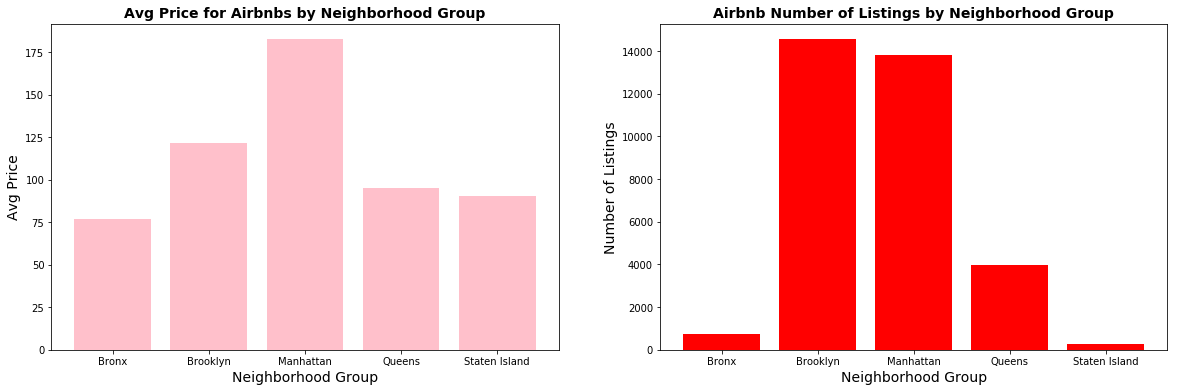

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize = (20,6))

ax[0].bar(combo.neighbourhood_group_cleansed, combo.Average_Price, color = "pink")

ax[0].set_title("Avg Price for Airbnbs by Neighborhood Group", fontsize = 14, fontweight = "bold")  
                                                                  
ax[0].set_ylabel("Avg Price", fontsize = 14,)
ax[0].set_xlabel("Neighborhood Group", fontsize = 14,)

ax[1].bar(combo.neighbourhood_group_cleansed, combo.Number_of_Listings, color = 'red')

ax[1].set_title("Airbnb Number of Listings by Neighborhood Group", fontsize = 14, fontweight = 'bold')

ax[1].set_ylabel("Number of Listings", fontsize = 14,)
ax[1].set_xlabel("Neighborhood Group", fontsize = 14,)

plt.show()

In [30]:
#finding the average price for each room type in each neighbourhood group
neighborhood_price = listings.groupby(['neighbourhood_group_cleansed','room_type']).price.mean()
neighborhood_price = neighborhood_price.reset_index()
neighborhood_price = neighborhood_price.sort_values('price',ascending=[0])
neighborhood_price

,neighbourhood_group_cleansed,room_type,price
6,Manhattan,Entire home/apt,245.195040
3,Brooklyn,Entire home/apt,177.024799
9,Queens,Entire home/apt,142.449502
12,Staten Island,Entire home/apt,130.965812
0,Bronx,Entire home/apt,119.712389
14,Staten Island,Shared room,112.500000
7,Manhattan,Private room,104.247273
8,Manhattan,Shared room,78.336667
4,Brooklyn,Private room,70.967570
10,Queens,Private room,69.506990


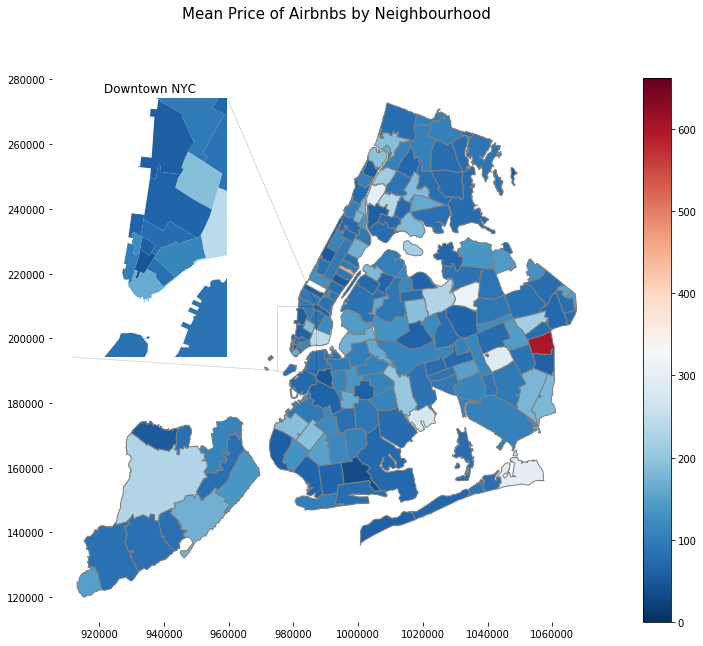

In [31]:
#a map showing the mean price in each neighbourhood 
fig, ax = plt.subplots(figsize=(15,10));

gdf_listings.plot(ax = ax, edgecolor='tab:grey', column = 'mean_price', cmap='RdBu_r', vmin=0, vmax=1.1*gdf_listings.mean_price.max(), legend = True)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

fig.suptitle("Mean Price of Airbnbs by Neighbourhood", fontsize = 15)

#code for zoomed in picture of Downtown NYC is from Professor Michael Waugh's class Data Bootcamp
axins = zoomed_inset_axes(ax, 
                          4, 
                          loc=2, 
                          borderpad=2)  

gdf_listings.plot(ax = axins, column='mean_price', vmin=0, vmax=1.1*gdf_listings.mean_price.max(), cmap='RdBu_r')

x1, x2, y1, y2 = 975000, 987000, 190000, 210000
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.set_title("Downtown NYC")

mark_inset(ax, axins, loc1=3, loc2=1, alpha = 0.15)

axins.spines["right"].set_visible(False)
axins.spines["top"].set_visible(False)
axins.spines["left"].set_visible(False)
axins.spines["bottom"].set_visible(False)

axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)
plt.show()

### Airbnbs in Manhattan are the most expensive, followed by airbnbs in Brooklyn. As for room type, entire homes/apt are the most expensive. Manhattan airbnbs with entire homes/apt are the most expensive in New York City, priced at 245.2 dollars. 

### Prices of shared rooms and private rooms vary depending on location. An interesting find is that some shared rooms are more expensive than private rooms. This means that another variable such as location is a more important determining factor for price.  Shared rooms in Staten Island are more expensive than private rooms in Manhattan.  The cheapest airbnb listing in New York City is a shared room in Brooklyn. 

### We are also able to conclude that on average the majority of the listings are between 100-300 dollars, with the exception of Astoria where there is a listing for 10,000 dollars per night, which is skewing the averages.

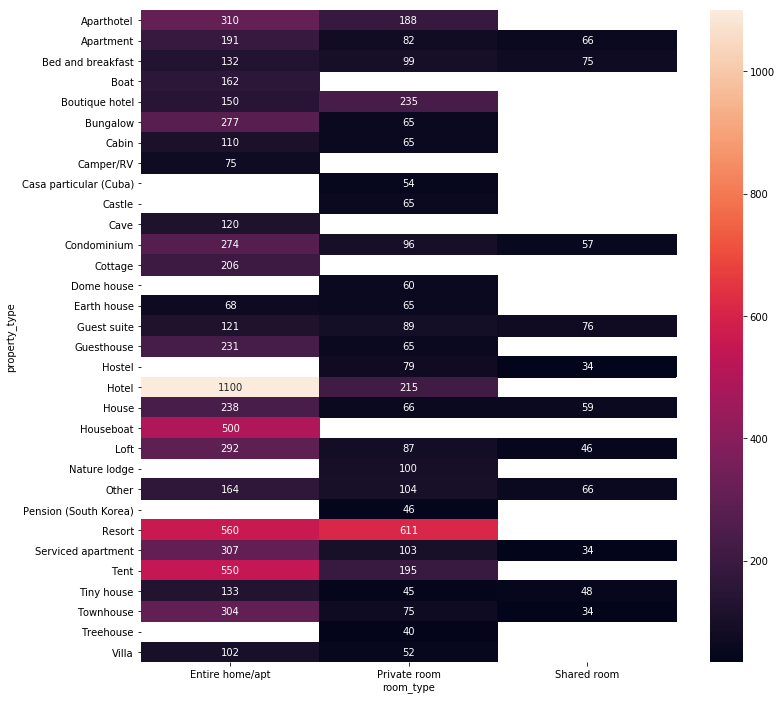

In [32]:
#a heatmap to evaluate the relationship between prices and property type and room type
#code for seaborn heatmap is from https://seaborn.pydata.org/generated/seaborn.heatmap.html 
#and http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(listings.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

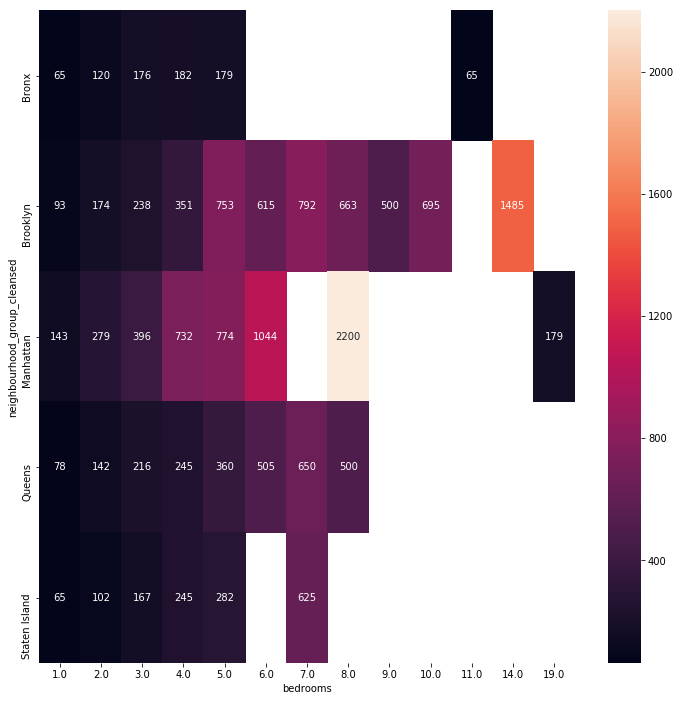

In [33]:
#a heat map to evaluate the relationship between prices and neighbourhood group and bedrooms
plt.figure(figsize=(12,12))
sns.heatmap(listings.groupby([
        'neighbourhood_group_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

### Through this we are able to determine that pricing varies largely with the amount of bedrooms in a listing, as well as the location. It can be seen that Manahatan has the highest number of not only single bedroom listing, but also the only neighborhood with 19 bedroom listings. Brooklyn has an extremely high amount of larger bedroom listing, which makes sense as they had the highest number of listings on airbnb- specifically private room listings within a larger listing. 

### Prices also vary depending on property type. We can see that there is an airbnb listing priced at 1100 dollars, which makes sense because the airbnb listing is a hotel. 

In [34]:
#analyzing the availablility of airbnbs
availability_365 = listings[['neighbourhood_group_cleansed', 'availability_365']]
availability_365 = availability_365.groupby(['neighbourhood_group_cleansed']).mean()
availability_365

,availability_365
neighbourhood_group_cleansed,
Bronx,175.614765
Brooklyn,105.076537
Manhattan,108.267569
Queens,151.961451
Staten Island,205.392996


In [35]:
#combining the average price and availability
new_availability_365 = availability_365.reset_index()
availability_price = pd.merge(new_availability_365, avg_price ,on='neighbourhood_group_cleansed')
availability_price

,neighbourhood_group_cleansed,availability_365,Average_Price
0,Bronx,175.614765,76.789262
1,Brooklyn,105.076537,121.322363
2,Manhattan,108.267569,182.661142
3,Queens,151.961451,95.002268
4,Staten Island,205.392996,90.287938


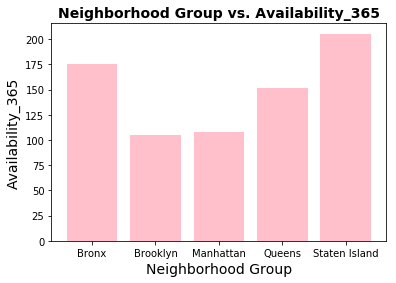

In [36]:
fig, ax = plt.subplots()

ax.bar(availability_365.index, availability_365.availability_365, color = "pink")

ax.set_title("Neighborhood Group vs. Availability_365", fontsize = 14, fontweight = "bold")  
                                                                  
ax.set_ylabel("Availability_365", fontsize = 14,)
ax.set_xlabel("Neighborhood Group", fontsize = 14,)

plt.show()

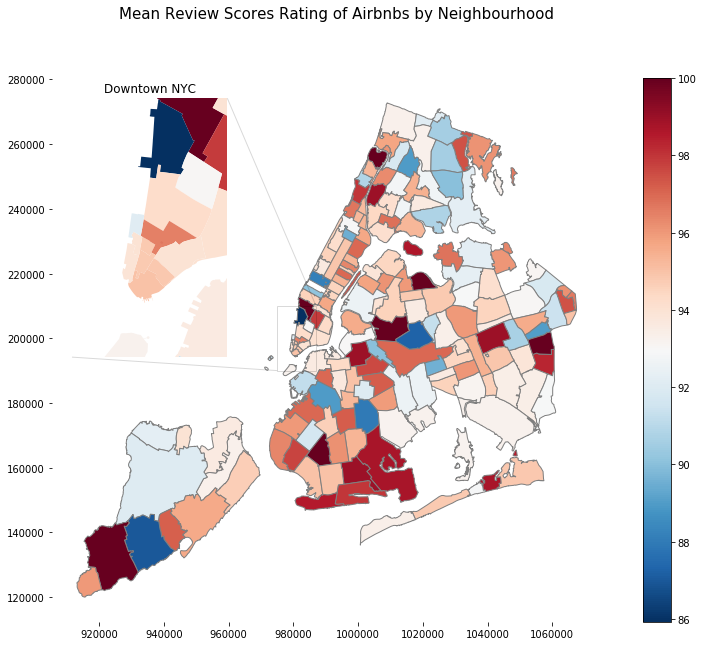

In [37]:
#a map showing the mean review scores for each neighbourhood 
fig, ax = plt.subplots(figsize=(15,10));

gdf_listings.plot(ax = ax, edgecolor='tab:grey', column = 'eval_mean_val', cmap='RdBu_r', legend = True)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

fig.suptitle("Mean Review Scores Rating of Airbnbs by Neighbourhood", fontsize = 15)

#code for zoomed in picture of Downtown NYC is from Mike's class Data Bootcamp
axins = zoomed_inset_axes(ax, 
                          4, 
                          loc=2, 
                          borderpad=2)  

gdf_listings.plot(ax = axins, column='eval_mean_val', cmap='RdBu_r')

x1, x2, y1, y2 = 975000, 987000, 190000, 210000
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.set_title("Downtown NYC")

mark_inset(ax, axins, loc1=3, loc2=1, alpha = 0.15)

axins.spines["right"].set_visible(False)
axins.spines["top"].set_visible(False)
axins.spines["left"].set_visible(False)
axins.spines["bottom"].set_visible(False)

axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)

plt.show()

### We are able to determine that the higher the availbility the lower the average price. Staten island has the highest availability and therefore it also has the lowest average price. Manhattan and Brooklyn have relatively similar availability, however Brooklyn's average price is much lower than Manhattan. This could be due to location factors, and as mentioned above Brooklyn has more private rooms available than entire apartments/homes than Manhattan which are often cheaper to book. 

### Further, the majority of review scores for all of the nieghborhoods are relitively high. This shows that there is not a strong relationship between average review and price level. This makes sense due to Airbnbs business model, where listings rely on high costumer reviews in order to stay active. Overall location has the highest effect on pricing for Airbnbs in New York. 

## ANALYSIS PART THREE
### SEASONAL PATTERN OF PRICES
The last will explore how prices vary across different seasons. We plan to have visualizations showing how prices change over the year and provide explanations as to how this affects Airbnb prices. For example, airbnb prices during the holidays might be more expensive than during non-holidays.

In [38]:
#using the clean_calendar csv to evaluate prices over the year 
year=calendar_df.groupby(['Year','Month']).price.mean()
year=year.reset_index()
year=year.rename(columns={'price':'Average_Price'})
year['Year_Month']=year['Year'].map(str) + "-" + year['Month'].map(str)
year.head()

,Year,Month,Average_Price,Year_Month
0,2019,3,143.946696,2019-3
1,2019,4,150.627914,2019-4
2,2019,5,153.468202,2019-5
3,2019,6,153.986027,2019-6
4,2019,7,156.497352,2019-7


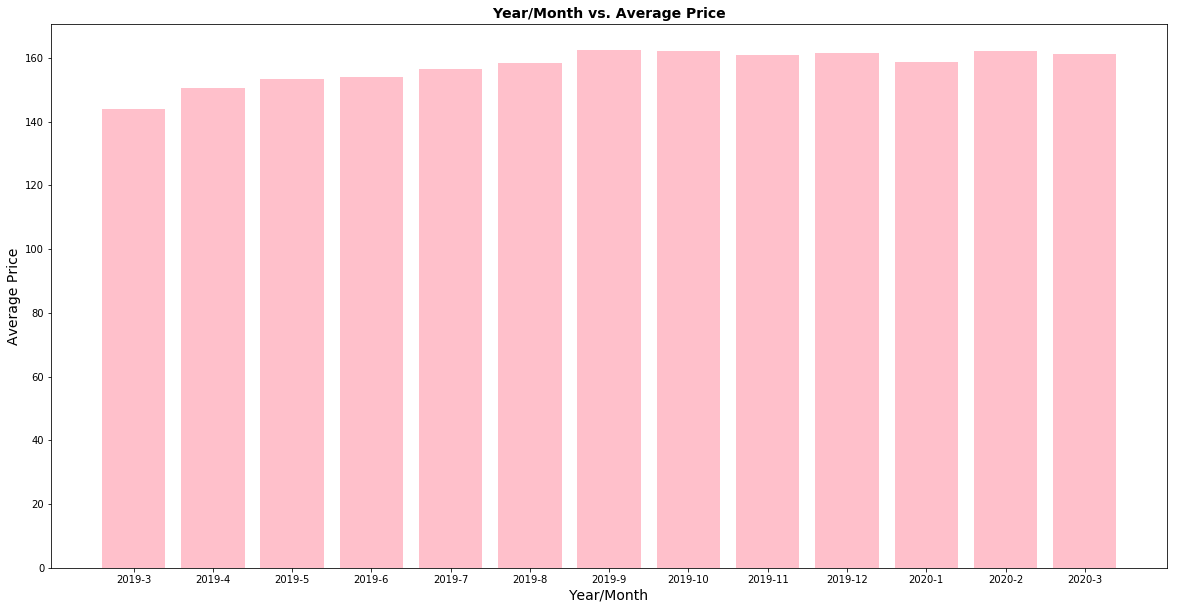

In [39]:
fig, ax = plt.subplots(figsize = (20,10))

ax.bar(year.Year_Month, year.Average_Price, color = "pink")

ax.set_title("Year/Month vs. Average Price", fontsize = 14, fontweight = "bold")  
                                                                  
ax.set_ylabel("Average Price", fontsize = 14,)
ax.set_xlabel("Year/Month", fontsize = 14,)

plt.show()

In [40]:
#using the listings_calendar csv to evaluate prices across the year in specific neighbourhoods
calendar_price = listings_calendar[['neighbourhood_group_cleansed', 'date', 'price_y', "Year", "Month", "Day"]]
calendar_price.head()

,neighbourhood_group_cleansed,date,price_y,Year,Month,Day
0,Manhattan,2019-03-06,185.0,2019,3,6
1,Manhattan,2019-03-07,185.0,2019,3,7
2,Manhattan,2019-03-08,185.0,2019,3,8
3,Manhattan,2019-03-09,185.0,2019,3,9
4,Manhattan,2019-03-10,185.0,2019,3,10


In [41]:
#finding the prices across the year in Manhattan
manhattan_calendar_price = calendar_price.loc[calendar_price['neighbourhood_group_cleansed'] == "Manhattan"]
manhattan_calendar_price.head()

,neighbourhood_group_cleansed,date,price_y,Year,Month,Day
0,Manhattan,2019-03-06,185.0,2019,3,6
1,Manhattan,2019-03-07,185.0,2019,3,7
2,Manhattan,2019-03-08,185.0,2019,3,8
3,Manhattan,2019-03-09,185.0,2019,3,9
4,Manhattan,2019-03-10,185.0,2019,3,10


In [42]:
#finding the average prices per month in Mahattan 
manhattan_year=manhattan_calendar_price.groupby(['Year','Month']).price_y.mean()
manhattan_year=manhattan_year.reset_index()
manhattan_year=manhattan_year.rename(columns={'price_y':'Average_Price'})
manhattan_year['Year_Month']=manhattan_year['Year'].map(str) + "-" + manhattan_year['Month'].map(str)
manhattan_year.head()

,Year,Month,Average_Price,Year_Month
0,2019,3,169.821029,2019-3
1,2019,4,181.867487,2019-4
2,2019,5,186.553212,2019-5
3,2019,6,187.258937,2019-6
4,2019,7,190.420792,2019-7


In [43]:
#finding the prices across the year in Brooklyn
brooklyn_calendar_price = calendar_price.loc[calendar_price['neighbourhood_group_cleansed'] == "Brooklyn"]
brooklyn_calendar_price.head()

,neighbourhood_group_cleansed,date,price_y,Year,Month,Day
365,Brooklyn,2019-03-06,180.0,2019,3,6
366,Brooklyn,2019-03-07,180.0,2019,3,7
367,Brooklyn,2019-03-08,180.0,2019,3,8
368,Brooklyn,2019-03-09,180.0,2019,3,9
369,Brooklyn,2019-03-10,180.0,2019,3,10


In [44]:
#finding the average prices per month in Brooklyn
brooklyn_year=brooklyn_calendar_price.groupby(['Year','Month']).price_y.mean()
brooklyn_year=brooklyn_year.reset_index()
brooklyn_year=brooklyn_year.rename(columns={'price_y':'Average_Price'})
brooklyn_year['Year_Month']=brooklyn_year['Year'].map(str) + "-" + brooklyn_year['Month'].map(str)
brooklyn_year.head()

,Year,Month,Average_Price,Year_Month
0,2019,3,115.851354,2019-3
1,2019,4,119.921534,2019-4
2,2019,5,121.870839,2019-5
3,2019,6,122.288361,2019-6
4,2019,7,124.569803,2019-7


In [45]:
#finding the prices across the year in Queens
queens_calendar_price = calendar_price.loc[calendar_price['neighbourhood_group_cleansed'] == "Queens"]
queens_calendar_price.head()

,neighbourhood_group_cleansed,date,price_y,Year,Month,Day
23360,Queens,2019-03-07,135.0,2019,3,7
23361,Queens,2019-03-08,135.0,2019,3,8
23362,Queens,2019-03-09,135.0,2019,3,9
23363,Queens,2019-03-10,135.0,2019,3,10
23364,Queens,2019-03-11,135.0,2019,3,11


In [46]:
#finding the average prices per month in Queens
queens_year=queens_calendar_price.groupby(['Year','Month']).price_y.mean()
queens_year=queens_year.reset_index()
queens_year=queens_year.rename(columns={'price_y':'Average_Price'})
queens_year['Year_Month']=queens_year['Year'].map(str) + "-" + queens_year['Month'].map(str)
queens_year.head()

,Year,Month,Average_Price,Year_Month
0,2019,3,89.887583,2019-3
1,2019,4,93.110099,2019-4
2,2019,5,94.921426,2019-5
3,2019,6,95.476400,2019-6
4,2019,7,97.135946,2019-7


In [47]:
#finding the prices across the years in the Bronx
bronx_calendar_price = calendar_price.loc[calendar_price['neighbourhood_group_cleansed'] == "Bronx"]
bronx_calendar_price.head()

,neighbourhood_group_cleansed,date,price_y,Year,Month,Day
24820,Bronx,2019-03-07,78.0,2019,3,7
24821,Bronx,2019-03-08,78.0,2019,3,8
24822,Bronx,2019-03-09,78.0,2019,3,9
24823,Bronx,2019-03-10,78.0,2019,3,10
24824,Bronx,2019-03-11,78.0,2019,3,11


In [48]:
#finding the average prices per month in the Bronx
bronx_year=bronx_calendar_price.groupby(['Year','Month']).price_y.mean()
bronx_year=bronx_year.reset_index()
bronx_year=bronx_year.rename(columns={'price_y':'Average_Price'})
bronx_year['Year_Month']=bronx_year['Year'].map(str) + "-" + bronx_year['Month'].map(str)
bronx_year.head()

,Year,Month,Average_Price,Year_Month
0,2019,3,73.898228,2019-3
1,2019,4,75.745907,2019-4
2,2019,5,76.685675,2019-5
3,2019,6,77.036292,2019-6
4,2019,7,78.915346,2019-7


In [49]:
#finding the prices across the year in Staten Island
statenisland_calendar_price = calendar_price.loc[calendar_price['neighbourhood_group_cleansed'] == "Staten Island"]
statenisland_calendar_price.head()

,neighbourhood_group_cleansed,date,price_y,Year,Month,Day
55115,Staten Island,2019-03-07,45.0,2019,3,7
55116,Staten Island,2019-03-08,45.0,2019,3,8
55117,Staten Island,2019-03-09,45.0,2019,3,9
55118,Staten Island,2019-03-10,45.0,2019,3,10
55119,Staten Island,2019-03-11,45.0,2019,3,11


In [50]:
#finding the prices per month in Staten Island
statenisland_year=statenisland_calendar_price.groupby(['Year','Month']).price_y.mean()
statenisland_year=statenisland_year.reset_index()
statenisland_year=statenisland_year.rename(columns={'price_y':'Average_Price'})
statenisland_year['Year_Month']=statenisland_year['Year'].map(str) + "-" + statenisland_year['Month'].map(str)
statenisland_year.head()

,Year,Month,Average_Price,Year_Month
0,2019,3,86.956062,2019-3
1,2019,4,89.622129,2019-4
2,2019,5,90.842640,2019-5
3,2019,6,91.332773,2019-6
4,2019,7,92.292356,2019-7


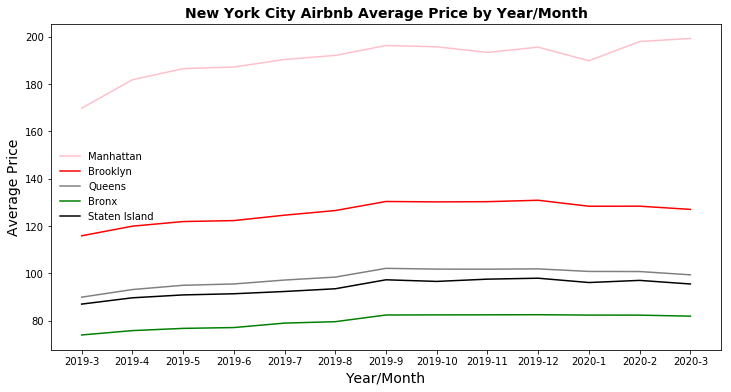

In [51]:
#a plot to show the prices per month of Airbnbs in each neighbourhood group 
fig, ax = plt.subplots(figsize = (12,6)) 

ax.plot(manhattan_year.Year_Month, manhattan_year.Average_Price, label = "Manhattan", color = "pink")
ax.plot(brooklyn_year.Year_Month, brooklyn_year.Average_Price, label = "Brooklyn", color = "red")
ax.plot(queens_year.Year_Month, queens_year.Average_Price, label = "Queens", color = "grey")
ax.plot(bronx_year.Year_Month, bronx_year.Average_Price, label = "Bronx", color = 'green')
ax.plot(statenisland_year.Year_Month, statenisland_year.Average_Price, label='Staten Island', color = "black")

ax.legend(frameon=False)

ax.set_title("New York City Airbnb Average Price by Year/Month", fontsize = 14, fontweight = "bold") 
                                                                  
ax.set_ylabel("Average Price", fontsize = 14,)
ax.set_xlabel("Year/Month", fontsize = 14,)

plt.show()

In [52]:
#information about holidays module is from https://pypi.org/project/holidays/ and
#https://www.geeksforgeeks.org/python-holidays-library/
#help with the code is from https://stackoverflow.com/questions/2394235/detecting-a-us-holiday and 
#https://stackoverflow.com/questions/29688899/pandas-checking-if-a-date-is-a-holiday-and-assigning-boolean-value
#adding name of day, holiday, and US holiday name to the calendar dataframe 
#If it is a holiday, it will be True and holiday name will be shown 
us_holidays = holidays.US()
calendar_df.fillna(0, inplace=True)
calendar_df['day_Name']='default' #Default to calendars with Monday as the first day of the week, and Sunday as the last
calendar_df['holiday']='False' 
calendar_df['us_holidays_name']='working'
for index,row in calendar_df.iterrows():
    sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day'])) #creating date in the format Year-Month-Day
    vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays #checking date to see if its a holiday 
    calendar_df.set_value(index,'day_Name',calendar.day_name[sdate.weekday()]) #getting the day of the week 
    calendar_df.set_value(index,'holiday',vall) #getting True or False 
    calendar_df.set_value(index,'us_holidays_name',us_holidays.get(sdate)) #getting the name of holiday

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [53]:
calendar_df.head()

,Unnamed: 0,listing_id,date,available,price,minimum_nights,maximum_nights,Year,Month,Day,day_Name,holiday,us_holidays_name
0,0,36647,2019-03-07,f,69.0,2.0,730.0,2019,3,7,Thursday,False,None
1,1,36647,2019-03-08,f,69.0,2.0,730.0,2019,3,8,Friday,False,None
2,2,36647,2019-03-09,f,69.0,2.0,730.0,2019,3,9,Saturday,False,None
3,3,36647,2019-03-10,f,69.0,2.0,730.0,2019,3,10,Sunday,False,None
4,4,36647,2019-03-11,f,69.0,2.0,730.0,2019,3,11,Monday,False,None


In [54]:
#finding average price for the day of the week
#assigning numbers to the day of the week - Monday:1, Tuesday:2, etc. 
calendar_day=calendar_df.groupby('day_Name').price.mean()
calendar_day=calendar_day.reset_index()
calendar_day['day_num']=0

for index,row in calendar_day.iterrows():
    if row['day_Name']=='Monday':
        calendar_day.set_value(index,'day_num',1)
    if row['day_Name']=='Tuesday':
        calendar_day.set_value(index,'day_num',2)
    if row['day_Name']=='Wednesday':
        calendar_day.set_value(index,'day_num',3)
    if row['day_Name']=='Thursday':
        calendar_day.set_value(index,'day_num',4)
    if row['day_Name']=='Friday':
        calendar_day.set_value(index,'day_num',5)
    if row['day_Name']=='Saturday':
        calendar_day.set_value(index,'day_num',6)
    if row['day_Name']=='Sunday':
        calendar_day.set_value(index,'day_num',7)
calendar_day=calendar_day.sort_values('day_num',ascending=[1])
calendar_day=calendar_day.rename(columns={'price':'Average_Price'})
calendar_day

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors inste

,day_Name,Average_Price,day_num
1,Monday,156.102005,1
5,Tuesday,156.171415,2
6,Wednesday,156.144117,3
4,Thursday,156.050243,4
0,Friday,160.112917,5
2,Saturday,160.339375,6
3,Sunday,156.298016,7


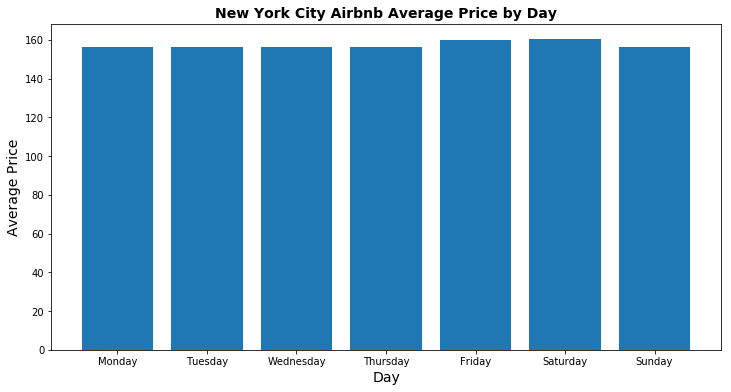

In [55]:
fig, ax = plt.subplots(figsize = (12,6)) 

ax.bar(calendar_day.day_Name, calendar_day.Average_Price)

ax.set_title("New York City Airbnb Average Price by Day", fontsize = 14, fontweight = "bold") 
                                                                  
ax.set_ylabel("Average Price", fontsize = 14,)
ax.set_xlabel("Day", fontsize = 14,)

plt.show()

In [56]:
#finding the number of listings during a given holiday
holiday_df=calendar_df.groupby('us_holidays_name').listing_id.count()
holiday_df=holiday_df.reset_index()
holiday_df=holiday_df.sort_values('listing_id',ascending=[0])
holiday_df

,us_holidays_name,listing_id
0,Christmas Day,49748
1,Columbus Day,49748
4,"Martin Luther King, Jr. Day",49748
6,New Year's Day,49748
7,Thanksgiving,49748
8,Veterans Day,49748
9,Washington's Birthday,49748
2,Independence Day,49747
3,Labor Day,49747
5,Memorial Day,49747


In [57]:
#finding the average price of an Airbnb during a given holiday 
holiday_price_df=calendar_df.groupby('us_holidays_name').price.mean()
holiday_price_df=holiday_price_df.reset_index()
holiday_price_df=holiday_price_df.sort_values('price',ascending=[0])

holiday_price_df.head(10)

,us_holidays_name,price
6,New Year's Day,162.423153
0,Christmas Day,162.239387
9,Washington's Birthday,160.791710
1,Columbus Day,160.780835
3,Labor Day,160.468269
7,Thanksgiving,159.833360
8,Veterans Day,159.151182
4,"Martin Luther King, Jr. Day",157.423112
2,Independence Day,154.759463
5,Memorial Day,152.030052


In [58]:
#combining two dataframes
holiday_listings_price=pd.merge(holiday_df,holiday_price_df,on='us_holidays_name')
holiday_listings_price=holiday_listings_price.rename(columns={'listing_id':'number_Of_listings'})
holiday_listings_price=holiday_listings_price.rename(columns={'price':'average_price'})
holiday_listings_price

,us_holidays_name,number_Of_listings,average_price
0,Christmas Day,49748,162.239387
1,Columbus Day,49748,160.780835
2,"Martin Luther King, Jr. Day",49748,157.423112
3,New Year's Day,49748,162.423153
4,Thanksgiving,49748,159.833360
5,Veterans Day,49748,159.151182
6,Washington's Birthday,49748,160.791710
7,Independence Day,49747,154.759463
8,Labor Day,49747,160.468269
9,Memorial Day,49747,152.030052


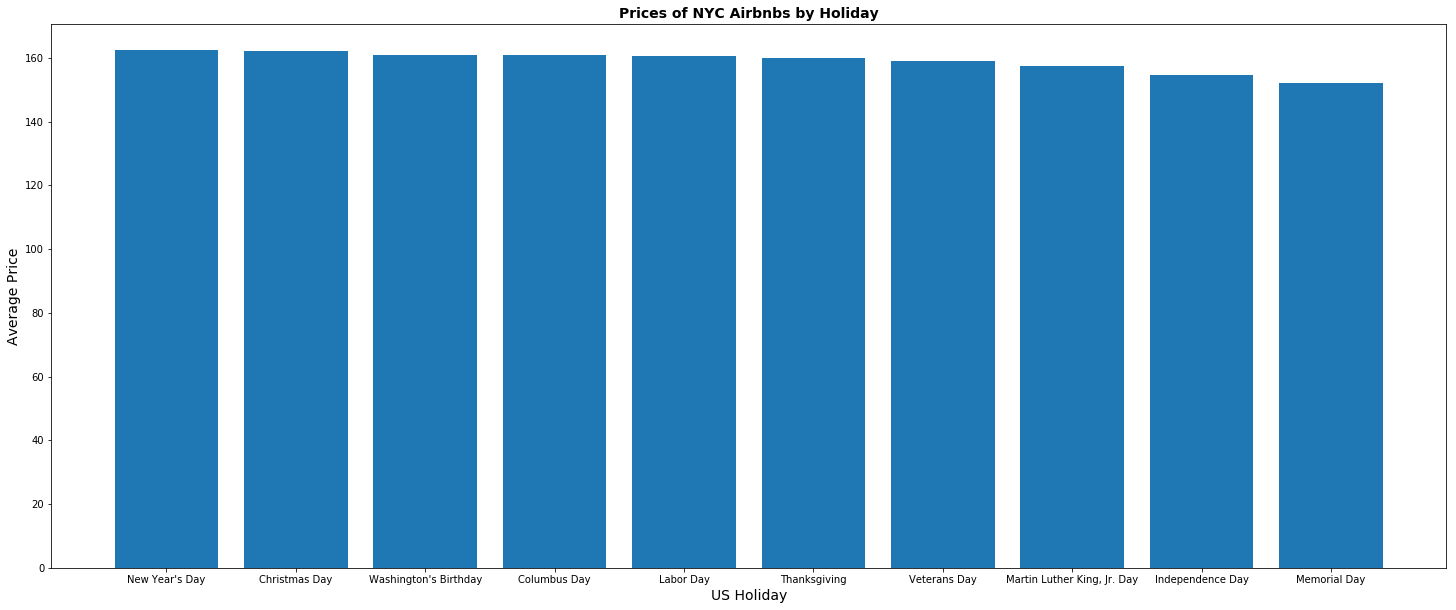

In [59]:
fig, ax = plt.subplots(figsize = (25,10)) 

ax.bar(holiday_price_df.us_holidays_name, holiday_price_df.price)

ax.set_title("Prices of NYC Airbnbs by Holiday", fontsize = 14, fontweight = "bold") 
                                                                  
ax.set_ylabel("Average Price", fontsize = 14,)
ax.set_xlabel("US Holiday", fontsize = 14,)

plt.show()

### We are able to conclude that the average listing price does not show a high degree of seasonality. Prices are relatively consistent throughout the year. The data shows a general upward trend in all of the neighborhoods, with prices increasing during the March until December.  Manhattan airbnb prices fluctuate the most throughout the year.

### There is also no significant difference between prices during each day of the week. Friday and Saturday prices are a little more expensive, priced at 160 dollars opposed to 156 dollars. 

### Holiday pricing is slighlty more expensive, but again the data does not show significant seasonality. Airbnb prices during the New Year's are the most expensive at 162.4 dollars. The summer holidays on average are less expensive than the winter holidays. A possible explanation for this could be the lower levels of tourism in the hotter months. 

## SUMMARY 
### To summarize our findings, we were able to determine that Airbnbs pricing is dependent on location as well as room type and property type. Further, seasonality does not have a strong affect on Airbnbs pricing levels in New York City. Overall, Airbnbs data shows a strong upward trend in terms of pricing on average for all of locations at any season. 

### If a host is interested in investing a property for Airbnb, we would offer the following recommendations based on our findings: 

#### 1. Invest in a property in Manhattan or Brooklyn to get maximum revenue from Airbnb
#### 2. Make sure your Airbnb is available and listed during the winter months. 
#### 3. Keep in mind that Airbnbs have more demand on Friday and the weekends. 
#### 3. Make sure your property/listing is in excellent condition as reviews are an important consideration factor for travelers/guests. 